In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.cross_validation import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score
import utils

In [2]:
train = pd.read_csv('data_train.csv', index_col='Unnamed: 0')

In [3]:
test = pd.read_csv('data_eval.csv', index_col='Unnamed: 0')

Ghost = 169626  
Electron = 5610  
Muon = 29839  
Pion = 774220  
Kaon = 138261  
Proton = 81951

In [4]:
old_features = {'Electron': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                             'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                             'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                             'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                             'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                             'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonIsMuon',
                             'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon', 'EcalPIDe',
                             'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Ghost': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                          'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                          'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                          'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                          'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                          'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonIsMuon',
                          'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon', 'EcalPIDe', 
                          'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Kaon': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                         'RichAboveKaThres', 'RichAbovePrThres', 'RichDLLe', 'RichDLLmu',
                         'RichDLLk', 'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                         'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                         'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe',
                         'InAccBrem', 'BremPIDe'],
                'Muon': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                         'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                         'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonNShared',
                         'InAccEcal', 'EcalPIDe', 'EcalPIDmu', 'InAccHcal', 'HcalPIDe',
                         'HcalPIDmu', 'InAccPrs', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Pion': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                         'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                         'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                         'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                         'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe',
                         'InAccBrem', 'BremPIDe'],
                'Proton': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                           'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                           'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                           'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                           'RichAboveKaThres', 'RichAbovePrThres', 'RichDLLe', 'RichDLLmu',
                           'RichDLLk', 'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                           'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                           'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'CaloPrsE',
                           'PrsPIDe', 'InAccBrem', 'BremPIDe']}

In [5]:
pid_dict = {"Ghost": 0,
            "Electron": 11,
            "Muon": 13,
            "Pion": 211,
            "Kaon": 321,
            "Proton": 2212
}
num_trees = {"Ghost": 150,
            "Electron": 200,
            "Muon": 130,
            "Pion": 110,
            "Kaon": 100,
            "Proton": 180}

In [6]:
params_ghost = {
    'nthread': 10,
    'eval_metric': 'auc',
    'eta': .2,
    'max_depth': 7,
    'subsample': .8,
    'colsample_bytree': .8,
    'colsample_bylevel': 1,
    'lambda': 1,
    'alpha': 0,
    'objective': 'binary:logistic',
    'seed': 42, 
    'silent': 1
}
params_ele = {
    'nthread': 10,
    'eval_metric': 'auc',
    'eta': .1,
    'max_depth': 7,
    'subsample': .8,
    'colsample_bytree': .8,
    'colsample_bylevel': 1,
    'lambda': 1,
    'alpha': 0,
    'objective': 'binary:logistic',
    'seed': 42, 
    'silent': 1
}
params_muon = {
    'nthread': 10,
    'eval_metric': 'auc',
    'eta': .1,
    'max_depth': 7,
    'subsample': .8,
    'colsample_bytree': .8,
    'colsample_bylevel': 1,
    'lambda': 1,
    'alpha': 0,
    'objective': 'binary:logistic',
    'seed': 42, 
    'silent': 1
}
params_pion = {
    'nthread': 10,
    'eval_metric': 'auc',
    'eta': .25,
    'max_depth': 7,
    'subsample': .8,
    'colsample_bytree': .8,
    'colsample_bylevel': 1,
    'lambda': 1,
    'alpha': 0,
    'objective': 'binary:logistic',
    'seed': 42, 
    'silent': 1
}
params_kaon = {
    'nthread': 10,
    'eval_metric': 'auc',
    'eta': .15,
    'max_depth': 7,
    'subsample': .8,
    'colsample_bytree': .8,
    'colsample_bylevel': 1,
    'lambda': 1,
    'alpha': 0,
    'objective': 'binary:logistic',
    'seed': 42, 
    'silent': 1
}
params_proton = {
    'nthread': 10,
    'eval_metric': 'auc',
    'eta': .1,
    'max_depth': 7,
    'subsample': .8,
    'colsample_bytree': .8,
    'colsample_bylevel': 1,
    'lambda': 1,
    'alpha': 0,
    'objective': 'binary:logistic',
    'seed': 42, 
    'silent': 1
}

## One-vs-all test

In [7]:
target = np.abs(train.MCParticleType.values)
mask = np.array([i not in [0, 11, 13, 211, 321, 2212] for i in np.abs(train.MCParticleType.values)])
target[mask] = np.zeros(mask.sum())

y_test = np.abs(test.MCParticleType.values)
mask = np.array([i not in [0, 11, 13, 211, 321, 2212] for i in np.abs(test.MCParticleType.values)])
y_test[mask] = np.zeros(mask.sum())

In [8]:
p_bins = np.percentile(train.TrackP.values, np.linspace(0, 100, 21))
pt_bins = np.percentile(train.TrackPt.values, np.linspace(0, 100, 21))

In [9]:
X_train, X_test = train_test_split(train, test_size=0.2, random_state=42, stratify=target)

In [124]:
train_w = np.ones(X_train.shape[0])
pw = X_train.shape[0]/(np.abs(X_train.MCParticleType.values) == pid_dict['Electron']).sum()
npw = X_train.shape[0]/(np.abs(X_train.MCParticleType.values) != pid_dict['Electron']).sum()
train_w[np.abs(X_train.MCParticleType.values) == pid_dict['Electron']] *= pw
train_w[np.abs(X_train.MCParticleType.values) != pid_dict['Electron']] *= npw

val_w = np.ones(X_test.shape[0])
pw = X_test.shape[0]/(np.abs(X_test.MCParticleType.values) == pid_dict['Electron']).sum()
npw = X_test.shape[0]/(np.abs(X_test.MCParticleType.values) != pid_dict['Electron']).sum()
val_w[np.abs(X_test.MCParticleType.values) == pid_dict['Electron']] *= pw
val_w[np.abs(X_test.MCParticleType.values) != pid_dict['Electron']] *= npw

dtrain = xgb.DMatrix(X_train[old_features['Electron']], 
                     label=(np.abs(X_train.MCParticleType.values) == pid_dict['Electron']).astype('int'),
                     feature_names=old_features['Electron'], weight=train_w)

dval = xgb.DMatrix(X_test[old_features['Electron']], 
                     label=(np.abs(X_test.MCParticleType.values) == pid_dict['Electron']).astype('int'),
                     feature_names=old_features['Electron'], weight=val_w)

watchlist = ((dtrain, 'train'), (dval, 'validation'))

In [125]:
xgb_params = {
    'nthread': 12,
    'eval_metric': 'auc',
    'eta': .1,
    'max_depth': 7,
    'subsample': 1.,
    'colsample_bytree': .8,
    'colsample_bylevel': 1.,
    'lambda': 1,
    'alpha': 0,
    'seed': 42, 
    'silent': 1
}

In [135]:
train_auc = list()
val_auc = list()
cvmplist = list()
cvmptlist = list()

def logregobj(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))
    grad = preds - labels
    hess = preds * (1.0-preds)
    return grad, hess

def customls(trackp, trackpt, alpha):
    def loglosscvm(preds, dtrain):
        #global train_auc
        #global val_auc
        #global cvmplist
        #global cvmptlist
        labels = dtrain.get_label()
        weights = dtrain.get_weight()
        preds = 1.0 / (1.0 + np.exp(-preds))
        grad = preds - labels
        hess = preds * (1.0-preds)
        p_bins = np.percentile(trackp[labels == 1], np.linspace(0, 100, 21))
        pt_bins = np.percentile(trackpt[labels == 1], np.linspace(0, 100, 21))
        bining_p = np.digitize(trackp[labels == 1], p_bins)
        bining_pt = np.digitize(trackpt[labels == 1], pt_bins)
        
        sorted_preds_all = np.sort(preds[labels == 1])
        sorted_cdf_all = np.arange(1, len(preds[labels == 1])+1)/len(preds[labels == 1])
        cvmdP = np.zeros(preds[labels == 1].shape)
        cvmdPt = np.zeros(preds[labels == 1].shape)
        
        for binn in range(len(p_bins)):
            loc_preds = (preds[labels == 1])[bining_p == (binn+1)]
            sorted_preds_loc = np.sort(loc_preds)
            sorted_cdf_loc = np.arange(1, len(loc_preds)+1)/len(loc_preds)
            dif = np.zeros(len(loc_preds))
            p_loc = 0
            for p in range(len(sorted_preds_all)):
                dif[p_loc] += np.abs(sorted_cdf_all[p] - sorted_cdf_loc[p_loc])
                if sorted_preds_loc[p_loc] == sorted_preds_all[p] and p_loc < len(sorted_preds_loc)-1:
                    p_loc += 1
            cvmdP[bining_p == (binn+1)] = dif
        
        for binn in range(len(pt_bins)):
            loc_preds = (preds[labels == 1])[bining_pt == (binn+1)]
            sorted_preds_loc = np.sort(loc_preds)
            sorted_cdf_loc = np.arange(1, len(loc_preds)+1)/len(loc_preds)
            dif = np.zeros(len(loc_preds))
            p_loc = 0
            for p in range(len(sorted_preds_all)):
                dif[p_loc] += np.abs(sorted_cdf_all[p] - sorted_cdf_loc[p_loc])
                if sorted_preds_loc[p_loc] == sorted_preds_all[p] and p_loc < len(sorted_preds_loc)-1:
                    p_loc += 1
            cvmdPt[bining_pt == (binn+1)] = dif
        
        cvmP = np.zeros(preds.shape)
        cvmPt = np.zeros(preds.shape)
        cvmP[labels == 1] = cvmdP
        cvmPt[labels == 1] = cvmdPt
        #print(cvmdP, cvmdPt, flush=True)
#        print(preds[0])
        print(utils_old2.compute_cvm(preds, trackp))
        print(utils_old2.compute_cvm(preds, trackpt))
        #train_auc.append(roc_auc_score(labels, preds))
        #val_auc.append(roc_auc_score(labels, preds))
        #cvmplist.append(utils_old2.compute_cvm(preds, trackp))
        #cvmptlist.append(utils_old2.compute_cvm(preds, trackpt))
        grad += 2*alpha*(cvmP + cvmPt)
        #print(cvmP.mean(), cvmPt.mean())
#        print(grad[0])
        grad *= weights
        hess *= weights
        return grad, hess
    return loglosscvm

def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    # return a pair metric_name, result
    # since preds are margin(before logistic transformation, cutoff at 0)
    return 'error', float(sum(labels != (preds > 0.0))) / len(labels)

In [127]:
xgb_params = {
    'nthread': 12,
    'eval_metric': 'auc',
    'eta': .1,
    'max_depth': 5,
    'subsample': .7,
    'colsample_bytree': 1.,
    'lambda': 1,
    'alpha': 0,
    'seed': 42, 
    'silent': 1
}

In [136]:
try_gbm = xgb.train(xgb_params, dtrain, num_boost_round=2000, obj=customls(X_train.TrackP.values,
                                                                           X_train.TrackPt.values, .0), 
          evals=watchlist, early_stopping_rounds=300, verbose_eval=True, maximize=True)

Will train until validation error hasn't decreased in 300 rounds.
0.166379850605
0.166379850605
[0]	train-auc:0.968351	validation-auc:0.966937
0.0632338792221
0.0668180968164
[1]	train-auc:0.976223	validation-auc:0.974985
0.0534927679004
0.0590999753735
[2]	train-auc:0.977590	validation-auc:0.975624
0.0474073485587
0.0535228919208
[3]	train-auc:0.978331	validation-auc:0.976918
0.0471142028291
0.0528389169248
[4]	train-auc:0.979029	validation-auc:0.977120
0.0432345001546
0.048914347263
[5]	train-auc:0.979481	validation-auc:0.977050
0.0425817524844
0.0485871557137
[6]	train-auc:0.980535	validation-auc:0.978524
0.0414608648001
0.0470952376272
[7]	train-auc:0.981164	validation-auc:0.979450
0.0364185063337
0.0403030902065
[8]	train-auc:0.981493	validation-auc:0.979934
0.0365725629251
0.0409757098479
[9]	train-auc:0.981875	validation-auc:0.980201
0.0359627899003
0.040834359055
[10]	train-auc:0.982162	validation-auc:0.980422
0.035607833607
0.0411202527994
[11]	train-auc:0.982709	validation-au

KeyboardInterrupt: 

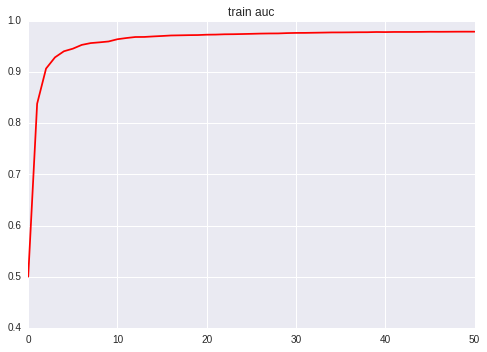

In [131]:
steps = 51
plt.title('train auc')
plt.plot(np.arange(steps), train_auc[:-1])

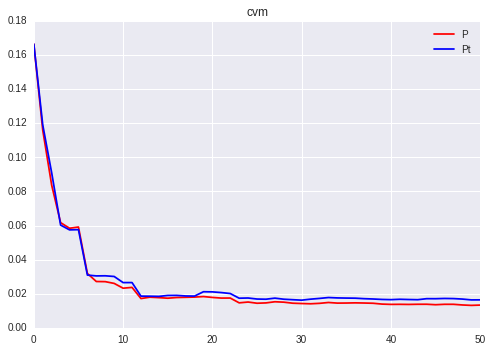

In [134]:
plt.title('cvm')
plt.plot(np.arange(steps), cvmplist, label='P')
plt.plot(np.arange(steps), cvmptlist, label='Pt')
plt.legend(loc=0)

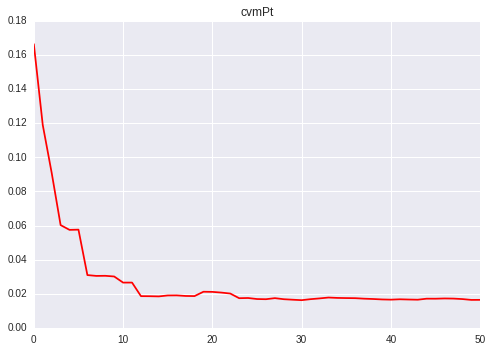

In [133]:
plt.title('cvmPt')
plt.plot(np.arange(steps), cvmptlist)

In [75]:
def get_xgboost(train, test, pid, feature_dict, xgb_params, tree_dict):
    train_w = np.ones(train.shape[0])
    pw = train.shape[0]/(np.abs(train.MCParticleType.values) == pid_dict[pid]).sum()
    npw = train.shape[0]/(np.abs(train.MCParticleType.values) != pid_dict[pid]).sum()
    train_w[np.abs(train.MCParticleType.values) == pid_dict[pid]] *= pw
    train_w[np.abs(train.MCParticleType.values) != pid_dict[pid]] *= npw
    
    dtrain = xgb.DMatrix(train[feature_dict[pid]], 
                     label=(np.abs(train.MCParticleType.values) == pid_dict[pid]).astype('int'),
                     feature_names=feature_dict[pid], weight=train_w)
    dtest = xgb.DMatrix(test[feature_dict[pid]], feature_names=feature_dict[pid])
    watchlist = [[dtrain, 'train']]
    
    xgb_params['nthread'] = 12
    
    final_gbm = xgb.train(xgb_params, dtrain, num_boost_round=50, obj=customls(train.TrackP.values,
                                                                           train.TrackPt.values, .01), 
                          evals=watchlist, 
                          verbose_eval=True, maximize=True)
    
    preds = final_gbm.predict(dtest)
    return preds

In [76]:
ele_preds = get_xgboost(train, test, 'Electron', old_features, params_ele, num_trees)
ghost_preds = get_xgboost(train, test, 'Ghost', old_features, params_ghost, num_trees)
muon_preds = get_xgboost(train, test, 'Muon', old_features, params_muon, num_trees)
pion_preds = get_xgboost(train, test, 'Pion', old_features, params_pion, num_trees)
kaon_preds = get_xgboost(train, test, 'Kaon', old_features, params_kaon, num_trees)
proton_preds = get_xgboost(train, test, 'Proton', old_features, params_proton, num_trees)

[0]	train-auc:0.851951
[1]	train-auc:0.937513
[2]	train-auc:0.956298
[3]	train-auc:0.967548
[4]	train-auc:0.970221
[5]	train-auc:0.971861
[6]	train-auc:0.974777
[7]	train-auc:0.976158
[8]	train-auc:0.976451
[9]	train-auc:0.977823
[10]	train-auc:0.978286
[11]	train-auc:0.978171
[12]	train-auc:0.978373
[13]	train-auc:0.978797
[14]	train-auc:0.979077
[15]	train-auc:0.979000
[16]	train-auc:0.979137
[17]	train-auc:0.979627
[18]	train-auc:0.979961
[19]	train-auc:0.979907
[20]	train-auc:0.979868
[21]	train-auc:0.980138
[22]	train-auc:0.980192
[23]	train-auc:0.980322
[24]	train-auc:0.980201
[25]	train-auc:0.980425
[26]	train-auc:0.980407
[27]	train-auc:0.980380
[28]	train-auc:0.980608
[29]	train-auc:0.980598
[30]	train-auc:0.980597
[31]	train-auc:0.980781
[32]	train-auc:0.980918
[33]	train-auc:0.980915
[34]	train-auc:0.980795
[35]	train-auc:0.980582
[36]	train-auc:0.980577
[37]	train-auc:0.980615
[38]	train-auc:0.980637
[39]	train-auc:0.980649
[40]	train-auc:0.980849
[41]	train-auc:0.980757
[4

In [77]:
target_m = np.zeros(y_test.shape)
target_m[y_test == pid_dict['Ghost']] = 0*np.ones((y_test == pid_dict['Ghost']).sum())
target_m[y_test == pid_dict['Muon']] = 1*np.ones((y_test == pid_dict['Muon']).sum())
target_m[y_test == pid_dict['Pion']] = 2*np.ones((y_test == pid_dict['Pion']).sum())
target_m[y_test == pid_dict['Kaon']] = 3*np.ones((y_test == pid_dict['Kaon']).sum())
target_m[y_test == pid_dict['Proton']] = 4*np.ones((y_test == pid_dict['Proton']).sum())
target_m[y_test == pid_dict['Electron']] = 5*np.ones((y_test == pid_dict['Electron']).sum())

preds = np.zeros((len(ele_preds), 6))
preds[:, 0] = ghost_preds
preds[:, 1] = muon_preds
preds[:, 2] = pion_preds
preds[:, 3] = kaon_preds
preds[:, 4] = proton_preds
preds[:, 5] = ele_preds

label_list = ['Ghost', 'Muon', 'Pion', 'Kaon', 'Proton', 'Electron']

/home/libfun/pid/utils.py:97: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new_labels[:, cl] = (labels == cl) * 1.


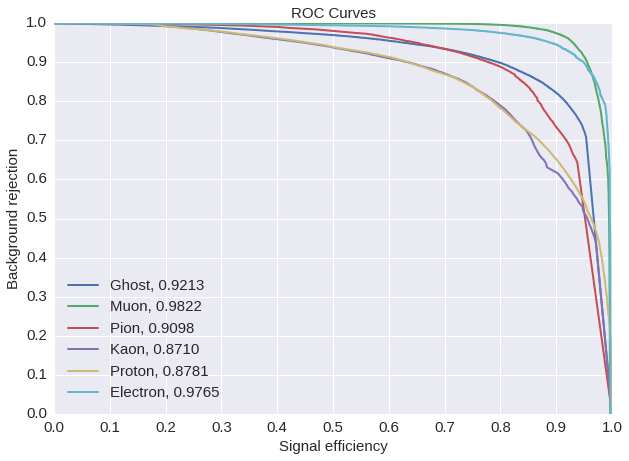

In [78]:
utils.get_roc_curves(target_m, preds, label_list)

/home/libfun/pid/utils.py:97: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new_labels[:, cl] = (labels == cl) * 1.


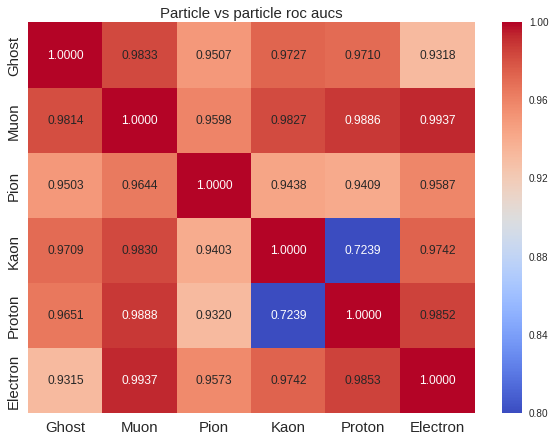

In [79]:
mat = utils.get_roc_auc_matrix(target_m, preds, label_list)

In [80]:
mat2 = pd.read_csv('./PID/python/class_vs_class_roc_auc_matrix_baseline.csv', index_col='Unnamed: 0')

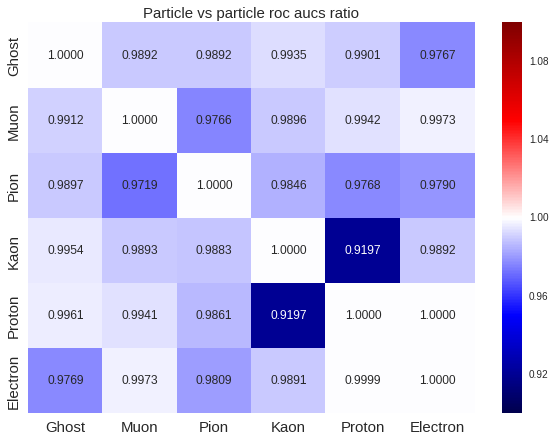

,Ghost,Muon,Pion,Kaon,Proton,Electron
Ghost,1.000000,0.989243,0.989187,0.993488,0.990094,0.976653
Muon,0.991236,1.000000,0.976558,0.989580,0.994246,0.997323
Pion,0.989679,0.971892,1.000000,0.984635,0.976769,0.979037
Kaon,0.995394,0.989268,0.988287,1.000000,0.919655,0.989160
Proton,0.996123,0.994125,0.986053,0.919655,1.000000,0.999974
Electron,0.976917,0.997323,0.980866,0.989114,0.999895,1.000000


In [81]:
utils.get_roc_auc_ratio_matrix(mat, mat2)

/home/libfun/pid/utils.py:857: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  roc_auc = roc_auc_score(one_labels, probas[:, one_class] / probas[:, two_class], sample_weight=weights)
/home/libfun/pid/utils.py:858: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  fpr, tpr, _ = roc_curve(one_labels, probas[:, one_class] / probas[:, two_class], sample_weight=weights)


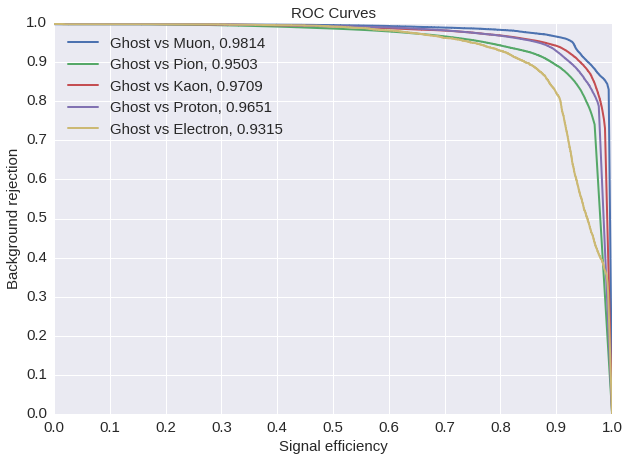

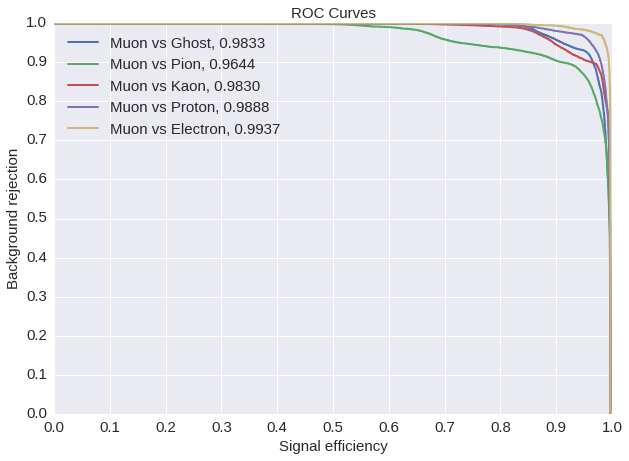

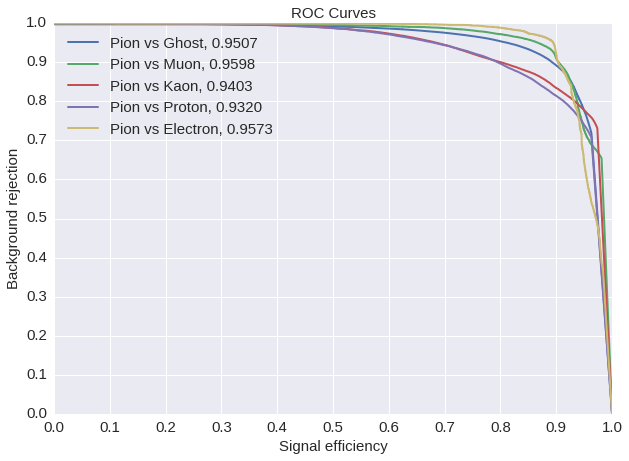

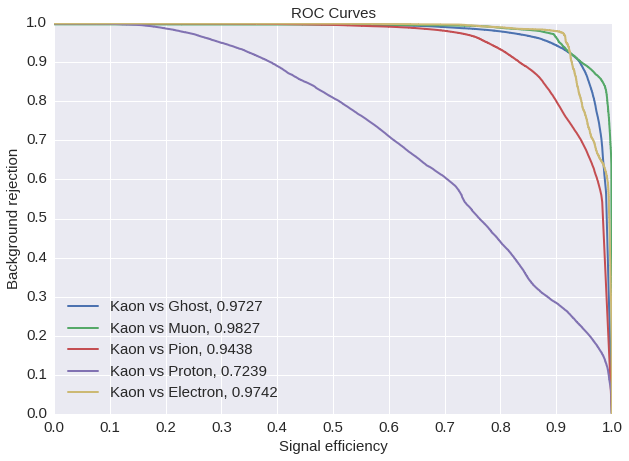

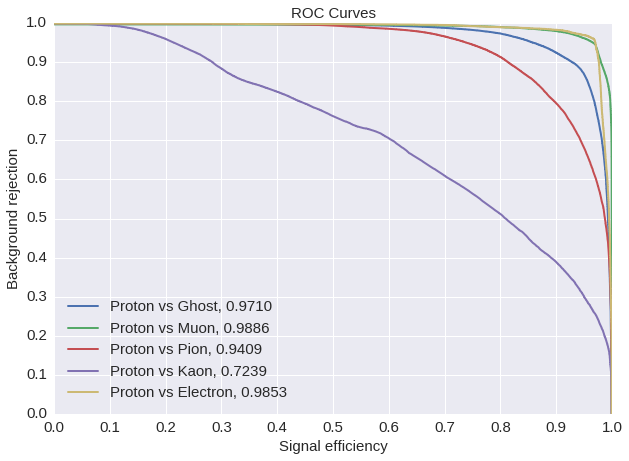

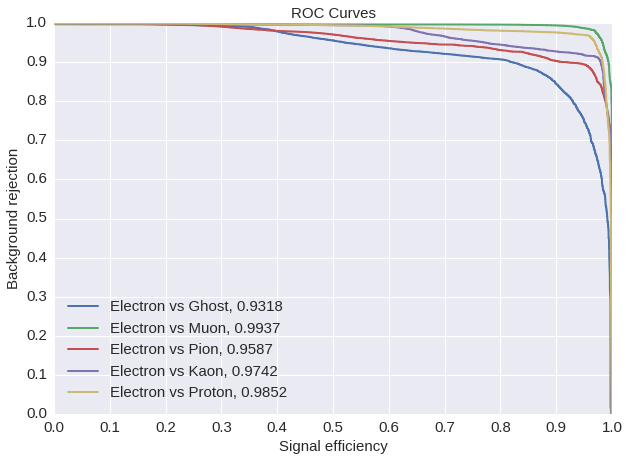

In [82]:
utils.get_one_vs_one_roc_curves(target_m, preds, label_list)

In [83]:
fl = utils.get_flatness_table(test, target_m, preds, label_list)

/home/libfun/pid/utils.py:97: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new_labels[:, cl] = (labels == cl) * 1.


In [84]:
fl

,TrackP,TrackPt,P_Conf_level,Pt_Conf_level
Ghost,0.014626,0.033374,0.000867,0.000873
Muon,0.035292,0.039554,0.000894,0.000897
Pion,0.023928,0.015761,0.000852,0.000850
Kaon,0.032620,0.038029,0.000872,0.000878
Proton,0.028704,0.043519,0.000893,0.000889
Electron,0.020556,0.024937,0.001005,0.001060


In [85]:
flatness_baseline = pd.read_csv("./PID/python/flatness_baseline.csv", index_col=0)
utils.get_flatness_ratio(fl, flatness_baseline)

,TrackP,TrackPt
Ghost,2.219175,2.352373
Muon,1.731031,0.879161
Pion,1.449123,1.148044
Kaon,0.757304,1.037433
Proton,0.828817,0.976394
Electron,3.140205,1.504091


In [99]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
%reload_ext utils_old2

/home/libfun/vrt/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


/home/libfun/pid/utils_old2.py:97: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new_labels[:, cl] = (labels == cl) * 1.


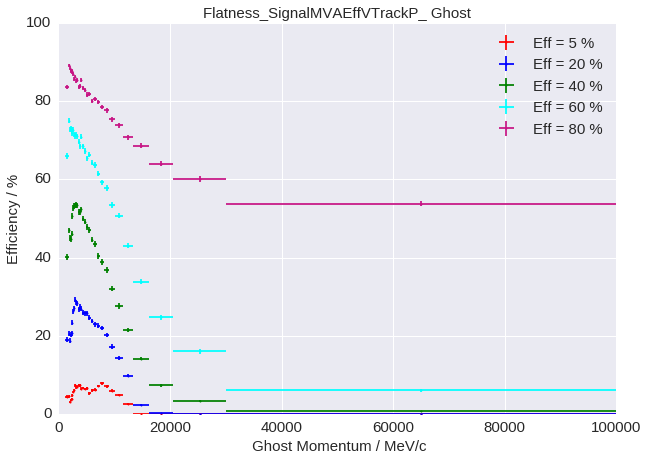

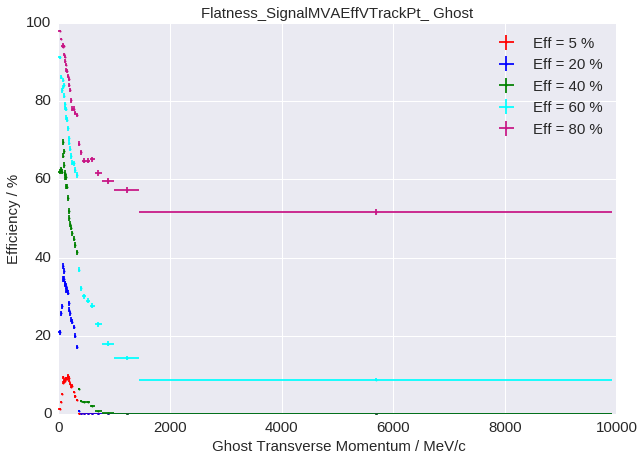

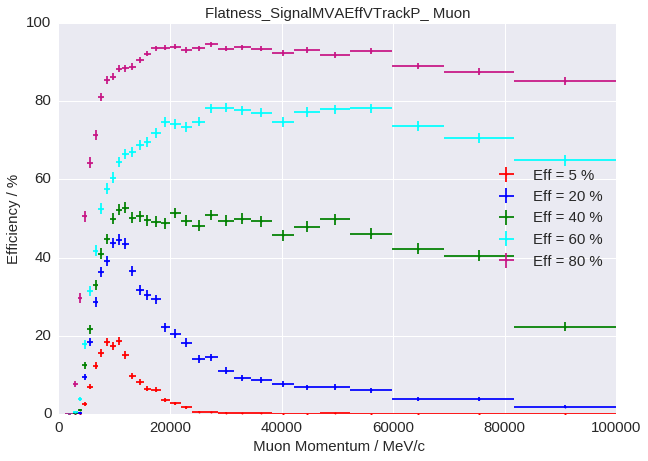

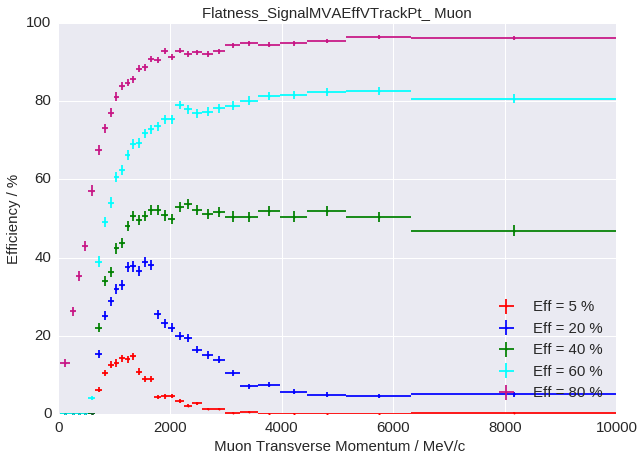

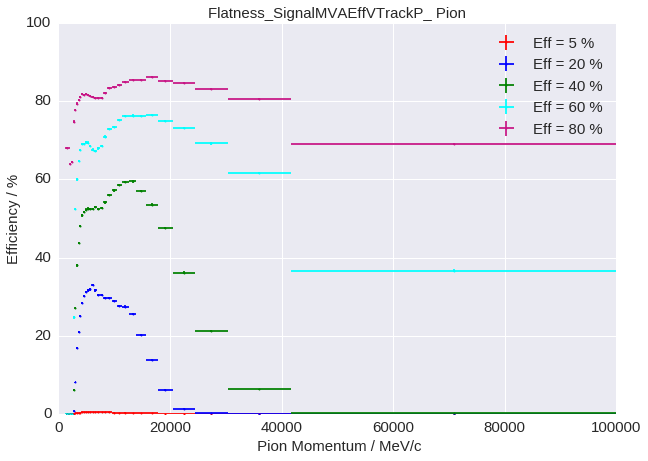

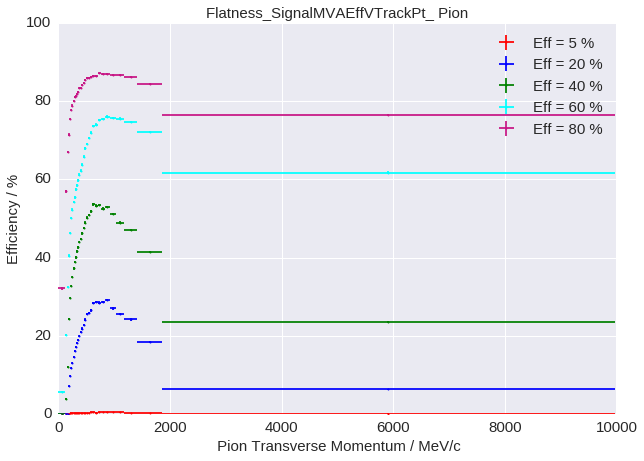

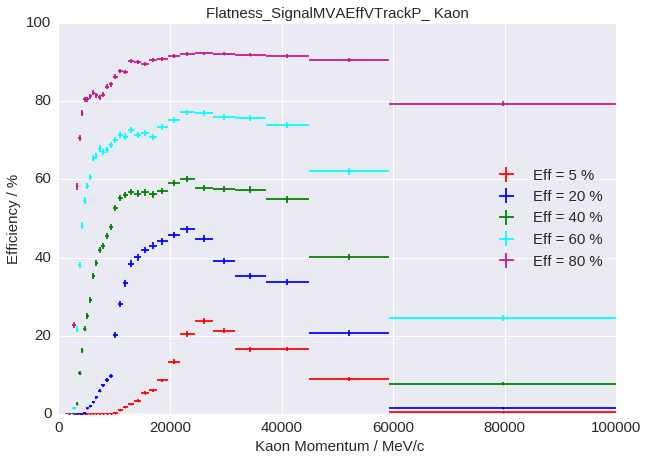

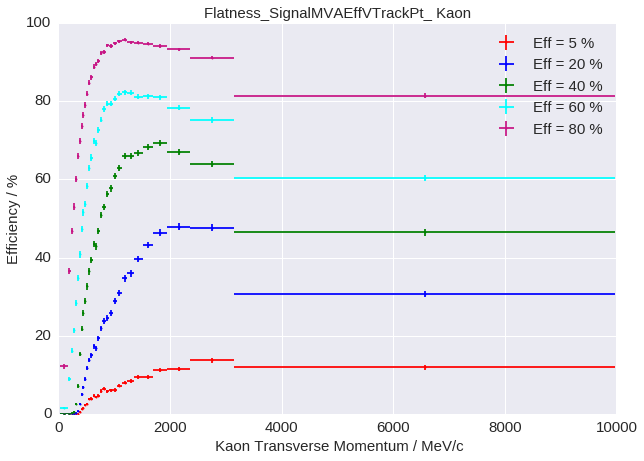

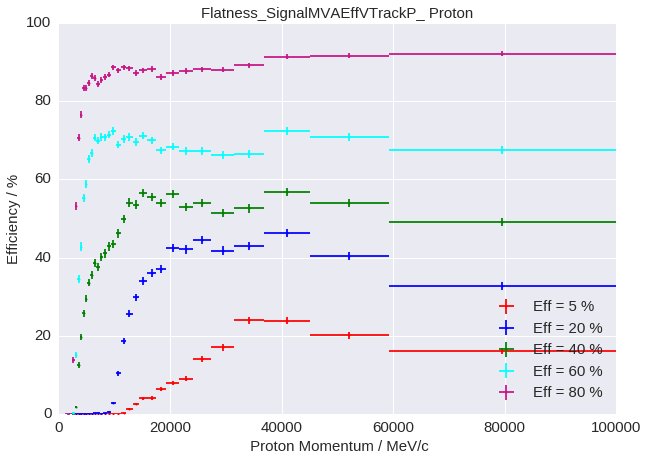

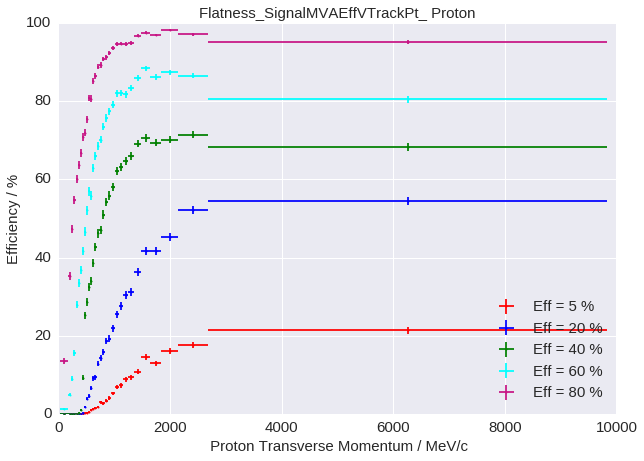

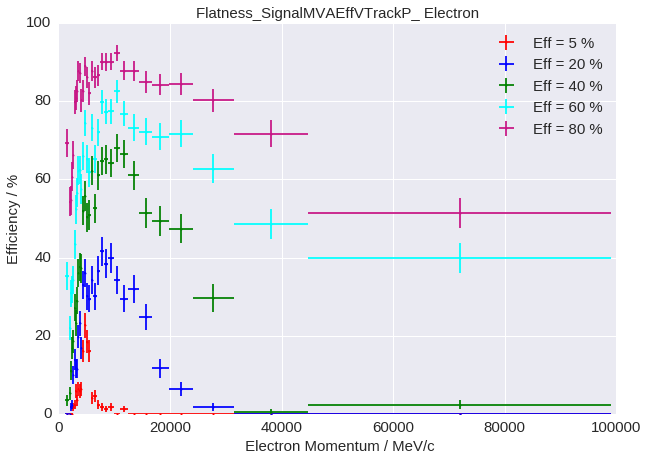

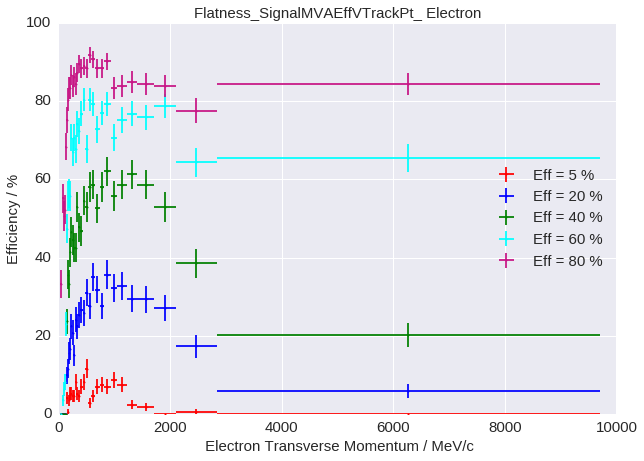

In [120]:
utils_old2.get_all_flatness_figures(test, preds, target_m, '', label_list, show=True)

In [86]:
from itertools import combinations
from sklearn.metrics import log_loss

auc_sum = 0.0

for ind1, ind2 in combinations(range(6), 2):
    auc_sum += mat.iloc[ind1, ind2]
print('Avg. pairwise ROC AUC:', auc_sum / 15)

print('Logloss:', log_loss(target_m, preds))

print('Mean flatness:', fl[['TrackP', 'TrackPt']].values.mean())

Avg. pairwise ROC AUC: 0.95074081663
Logloss: 1.54770191689
Mean flatness: 0.0292416643951
